In [1]:
import os
import argparse
import datetime
import re
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import shapely
import dask.array as da
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import rasterio.plot

In [2]:
from osgeo import ogr, osr, gdal
from rasterio.crs import CRS
from rasterio.warp import reproject, Resampling
from rasterio.features import bounds
from dateutil.relativedelta import *
from satsearch import Search
from datetime import datetime, timedelta
from pyproj import Transformer
from json import load
from satstac import Catalog, Collection, Item

In [3]:
# do this in terminal before running the jupyter lab server or in .bashrc
# export STAC_API_URL="https://earth-search.aws.element84.com/v0"

In [4]:
cat = Catalog.open('https://landsat-stac.s3.amazonaws.com/catalog.json')
print(cat, cat.filename)

col = Collection.open('https://landsat-stac.s3.amazonaws.com/landsat-8-l1/catalog.json')
print(col, col.filename)

item = Item.open('https://landsat-stac.s3.amazonaws.com/landsat-8-l1/111/111/2018-11-30/LC81111112018334LGN00.json')
print(item, item.filename)

filename = item.download('MTL')
print(filename)

landsat-stac https://landsat-stac.s3.amazonaws.com/catalog.json
landsat-8-l1 https://landsat-stac.s3.amazonaws.com/landsat-8-l1/catalog.json
LC81111112018334LGN00 https://landsat-stac.s3.amazonaws.com/landsat-8-l1/111/111/2018-11-30/LC81111112018334LGN00.json
landsat-8-l1/2018-11-30/LC81111112018334LGN00_MTL.txt


In [5]:
file_path = "./main_pipeline/input_geometries/doberitz_multipolygon.geojson"
input_geojson = gpd.read_file(file_path)
geometry = json.loads(input_geojson.dissolve().to_json())["features"][0]["geometry"]

In [6]:
# search last 60 days
current_date = datetime.now()
date_60_days_ago = current_date - timedelta(days=60)
current_date = current_date.strftime("%Y-%m-%d")
date_60_days_ago = date_60_days_ago.strftime("%Y-%m-%d")

# only request images with cloudcover less than 20%
query = {
    "eo:cloud_cover": {
        "lt": 20
        }
    }
search = Search(
    url='https://earth-search.aws.element84.com/v0',
    intersects=geometry,
    datetime=date_60_days_ago + "/" + current_date,
    collections=['sentinel-s2-l2a-cogs'],
    query=query
    )       

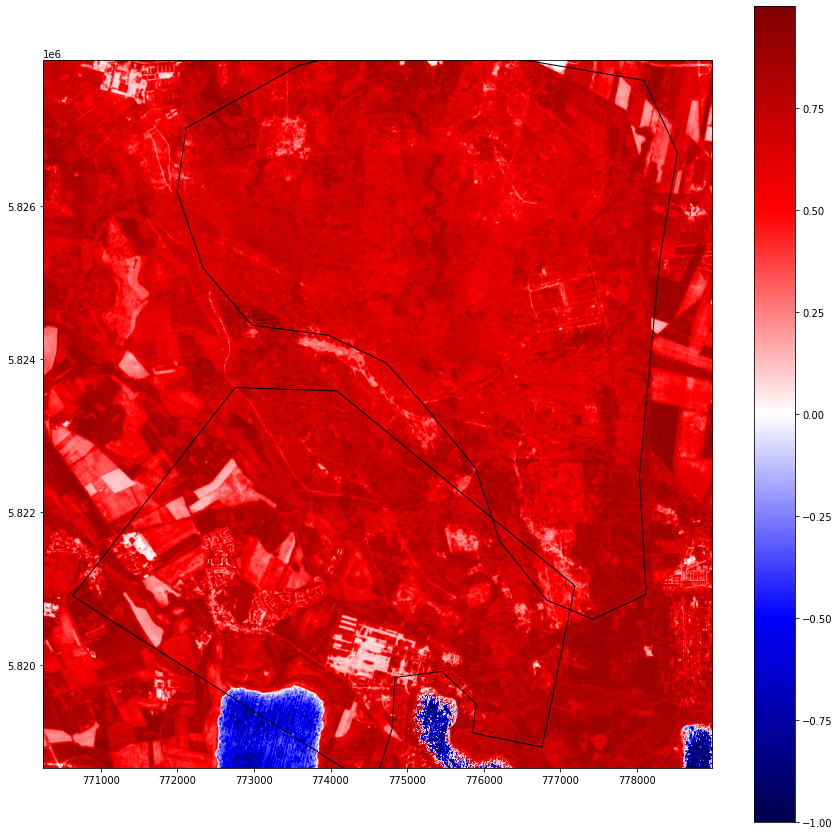

In [7]:
import rasterio.plot
import geopandas
file_path = "./main_pipeline/input_geometries/doberitz_multipolygon.geojson"
input_geometry = geopandas.read_file(file_path)

with rasterio.open("./sentinel_data/NDVI/S2B_32UQD_20211028_0_L2A__NDVI.tif", 'r') as raster:
    coord_transformer = Transformer.from_crs("epsg:4326", raster.crs) 
    input_geometry_proj = input_geometry.to_crs(raster.crs)
    arr = raster.read() 
    fig, ax = plt.subplots(figsize=(15, 15))
    image_hidden = ax.imshow(arr[0], cmap="seismic")
    fig.colorbar(image_hidden, ax=ax)
    input_geometry_proj.plot(ax=ax, facecolor='none', edgecolor='black')    
    rasterio.plot.show(raster, ax=ax, cmap="seismic")  


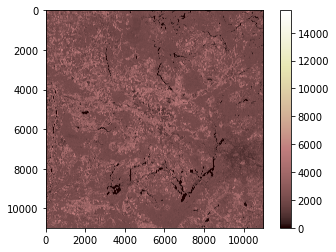

(1, 10980, 10980)
2368.517229156506
1042.5484465801721
(1, 10980, 10980)
2368.517229156506


In [ ]:
from matplotlib import pyplot

with rasterio.open("./sentinel_data/Sentinel/S2B_32UQD_20211028_0_L2A_B08.tif", 'r') as src:
    plt.imshow(src.read(1), cmap="pink")
    plt.colorbar()
    plt.show()
    arr = src.read() 
    print(arr.shape)
    print(arr.mean())
    print(arr.std())